In [1]:
#importing modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading DataFrames
df_app = pd.read_csv("application_record.csv")
df_credit = pd.read_csv("credit_record.csv")

In [3]:
#Displaying application dataframe, first 10 rows
df_app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [4]:
#Exploratory Data Analysis

In [5]:
df_app.shape #438557 rows, 18 columns

(438557, 18)

In [6]:
df_app.info() #consists of objects, int, and floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
#check for missing data
df_app.isnull().sum() #134203 rows of missing data 

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [8]:
#dropping the columns with missing data because 134203/438557 total columns is around 30% of missing data
#column also will not contribute much to the results of the data
df_app.drop('OCCUPATION_TYPE', axis = 1, inplace = True)

In [9]:
#check if columns were dropped
df_app.info() #columns were indeed dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
#Check for duplicate ID's in the application dataframe 
len(df_app['ID']) - len(df_app['ID'].unique()) #47 duplicate applciations 

47

In [11]:
#Drop the duplicates 
df_app = df_app.drop_duplicates('ID', keep = 'last') #no more duplicate or missing data 

In [12]:
#Credit record shape
df_credit.shape #1048575 rows, 3 columns

(1048575, 3)

In [13]:
#info
df_credit.info() #2 int, 1 object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [14]:
#Application Data Record categorical columns, numerical columns into a list
cat = df_app.columns[(df_app.dtypes == 'object').values].tolist()
num = df_app.columns[(df_app.dtypes != 'object').values].tolist()

In [15]:
#Displaying the unique values for the categorical column
for i in df_app.columns[(df_app.dtypes == 'object').values].tolist():
    print(i, '\n')
    print(df_app[i].value_counts())
    print("------------------------------------------------") 

CODE_GENDER 

F    294412
M    144098
Name: CODE_GENDER, dtype: int64
------------------------------------------------
FLAG_OWN_CAR 

N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64
------------------------------------------------
FLAG_OWN_REALTY 

Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64
------------------------------------------------
NAME_INCOME_TYPE 

Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
------------------------------------------------
NAME_EDUCATION_TYPE 

Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
------------------------------------------------
NAME_FAMILY_STATUS 

Married                 299798
Single / n

In [16]:
#Displaying numerical columns 
for i in df_app.columns[(df_app.dtypes != 'object').values].tolist():
    print(i, '\n')
    print(df_app[i].value_counts())
    print("------------------------------------------------") 

ID 

6291456    1
6430995    1
5388560    1
6471951    1
6480139    1
          ..
6604339    1
6608433    1
6569516    1
6690720    1
6293503    1
Name: ID, Length: 438510, dtype: int64
------------------------------------------------
CNT_CHILDREN 

0     304038
1      88518
2      39879
3       5430
4        486
5        133
7          9
9          5
6          4
12         4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64
------------------------------------------------
AMT_INCOME_TOTAL 

135000.0    46870
157500.0    39762
180000.0    37910
112500.0    36977
225000.0    34128
            ...  
374998.5        1
45346.5         1
265950.0        1
163260.0        1
167692.5        1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64
------------------------------------------------
DAYS_BIRTH 

-11707    150
-14178    121
-14400    116
-13482    112
-13274    112
         ... 
-24771      1
-8535       1
-9560       1
-9304       1
-8725       1
Name: DAYS_BIRTH, Length: 16

In [17]:
#Scaling columns based on time
#DAYS_EMPLOYED, DAYS_BIRTH


In [18]:
#Days birth contains negative values, convert to positive and into Years
df_app['DAYS_BIRTH'] = round(df_app['DAYS_BIRTH'] / -365, 0)
df_app.rename(columns = {'DAYS_BIRTH' : 'AGE'}, inplace = True)

In [19]:

#According to data, Negative means days since employed, positive means day unemployed
#Convert unemployed data to 0 years employed
unemployed = df_app[df_app['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].unique()
df_app['DAYS_EMPLOYED'].replace(unemployed, 0, inplace = True)

In [20]:
#Converting DAYS_EMPLOYED into years
df_app['DAYS_EMPLOYED'] = abs(round(df_app['DAYS_EMPLOYED'] / -365, 0))

In [21]:
#Rename DAYS_EMPLOYED into years_employed
df_app.rename(columns = {'DAYS_EMPLOYED' : 'YEARS_EMPLOYED'}, inplace = True)

In [22]:
df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,1.0


In [23]:
#Rename columns for ease 
df_app.rename(columns = {'CODE_GENDER' : 'GENDER'}, inplace = True)
df_app.rename(columns = {'FLAG_OWN_CAR' : 'CAR_OWNER'}, inplace = True)
df_app.rename(columns = {'FLAG_OWN_REALTY' : 'PROPERTY_OWNER'}, inplace = True)
df_app.rename(columns = {'AMT_INCOME_TOTAL' : 'INCOME'}, inplace = True)
df_app.rename(columns = {'NAME_INCOME_TYPE' : 'INCOME_TYPE'}, inplace = True)
df_app.rename(columns = {'NAME_EDUCATION_TYPE' : 'EDUCATION'}, inplace = True)
df_app.rename(columns = {'NAME_FAMILY_STATUS' : 'FAMILY_STATUS'}, inplace = True)
df_app.rename(columns = {'NAME_HOUSING_TYPE' : 'HOUSING'}, inplace = True)

In [24]:
#Drop useless columns
#Drop FLAG_MOBIL only 1 unique value 
df_app.drop('FLAG_MOBIL', axis = 1, inplace = True)

In [25]:
#Drop FLAG_WORK_PHONE
#having a work phone does not contribute to credit 
df_app.drop('FLAG_WORK_PHONE', axis = 1, inplace = True)


In [26]:
#Drop FLAG_EMAIL, does not contribute to credit
df_app.drop('FLAG_EMAIL', axis = 1, inplace = True)

In [27]:
#Drop FLAG_PHONE
df_app.drop('FLAG_PHONE', axis = 1, inplace = True)

In [28]:
df_app.head()

,ID,GENDER,CAR_OWNER,PROPERTY_OWNER,CNT_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


In [29]:
#encoding cat columns 
df_app['GENDER'].replace('M', 0, inplace = True)
df_app['GENDER'].replace('F', 1, inplace = True)
df_app['CAR_OWNER'].replace('Y', 0, inplace = True)
df_app['CAR_OWNER'].replace('N', 1, inplace = True)
df_app['PROPERTY_OWNER'].replace('Y', 0, inplace = True)
df_app['PROPERTY_OWNER'].replace('N', 1, inplace = True)

In [30]:
df_app['INCOME_TYPE'].value_counts()

Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: INCOME_TYPE, dtype: int64

In [31]:
#encoding continued
df_app['INCOME_TYPE'].replace('Working', 0, inplace = True)
df_app['INCOME_TYPE'].replace('Commercial associate', 1, inplace = True)
df_app['INCOME_TYPE'].replace('Pensioner', 2, inplace = True)
df_app['INCOME_TYPE'].replace('State servant', 3, inplace = True)
df_app['INCOME_TYPE'].replace('Student', 4, inplace = True)

In [32]:
df_app['EDUCATION'].value_counts()

Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: EDUCATION, dtype: int64

In [33]:
#encoding education
df_app['EDUCATION'].replace("Secondary / secondary special", 0, inplace = True)
df_app['EDUCATION'].replace("Higher education", 1, inplace = True)
df_app['EDUCATION'].replace("Incomplete higher", 2, inplace = True)
df_app['EDUCATION'].replace("Lower secondary", 3, inplace = True)
df_app['EDUCATION'].replace("Academic degree", 4, inplace = True)

In [34]:
df_app['FAMILY_STATUS'].value_counts()

Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: FAMILY_STATUS, dtype: int64

In [35]:
#encoding family status
df_app['FAMILY_STATUS'].replace("Married", 0, inplace = True)
df_app['FAMILY_STATUS'].replace("Single / not married", 1, inplace = True)
df_app['FAMILY_STATUS'].replace("Civil marriage", 2, inplace = True)
df_app['FAMILY_STATUS'].replace("Separated", 3, inplace = True)
df_app['FAMILY_STATUS'].replace("Widow", 4, inplace = True)

In [36]:
df_app['HOUSING'].value_counts()

House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: HOUSING, dtype: int64

In [37]:
#encoding housing 
df_app['HOUSING'].replace("House / apartment", 0, inplace = True)
df_app['HOUSING'].replace("With parents", 1, inplace = True)
df_app['HOUSING'].replace("Municipal apartment", 2, inplace = True)
df_app['HOUSING'].replace("Rented apartment", 3, inplace = True)
df_app['HOUSING'].replace("Office apartment", 4, inplace = True)
df_app['HOUSING'].replace("Co-op apartment", 5, inplace = True)

In [38]:
df_app.head()

,ID,GENDER,CAR_OWNER,PROPERTY_OWNER,CNT_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,0,0,0,0,427500.0,0,1,2,3,33.0,12.0,2.0
1,5008805,0,0,0,0,427500.0,0,1,2,3,33.0,12.0,2.0
2,5008806,0,0,0,0,112500.0,0,0,0,0,59.0,3.0,2.0
3,5008808,1,1,0,0,270000.0,1,0,1,0,52.0,8.0,1.0
4,5008809,1,1,0,0,270000.0,1,0,1,0,52.0,8.0,1.0


In [39]:
#Visualization, checking for outliers with boxplots for numerical columns 

/Users/calebsiow/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_CHILDREN'>

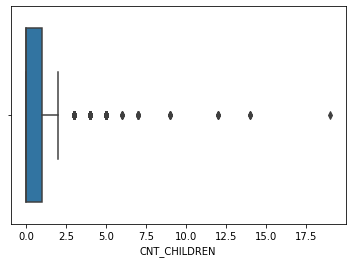

In [40]:
#CNT_CHILDREN
sns.boxplot(df_app['CNT_CHILDREN'])

In [41]:
#Removing Outliers from CNT_CHILDREN
high_bound = df_app['CNT_CHILDREN'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = df_app['CNT_CHILDREN'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 4.0
low_bound : 0.0


In [42]:
#restricting CNT_CHILDREN
df_app = df_app[(df_app['CNT_CHILDREN'] >= low_bound) & (df_app['CNT_CHILDREN'] <= high_bound)]

/Users/calebsiow/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INCOME'>

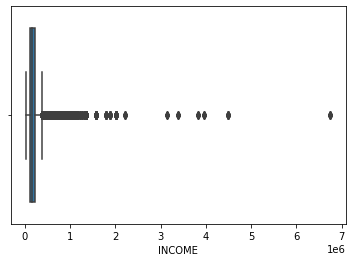

In [43]:
#boxplot for income
sns.boxplot(df_app['INCOME'])

In [44]:
#Removing Outliers from income
high_bound = df_app['INCOME'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = df_app['INCOME'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 990000.0
low_bound : 36000.0


In [45]:
df_app = df_app[(df_app['INCOME'] >= low_bound) & (df_app['INCOME'] <= high_bound)]

/Users/calebsiow/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

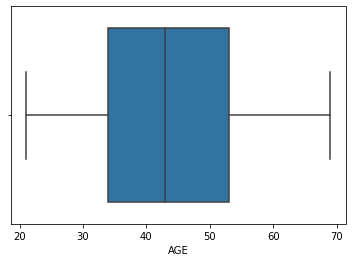

In [46]:
#boxplot for age
sns.boxplot(df_app['AGE']) #no outliers

/Users/calebsiow/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YEARS_EMPLOYED'>

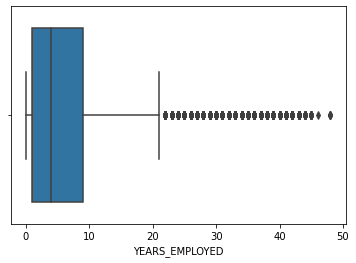

In [47]:
#boxplot for YEARS_EMPLOYED
sns.boxplot(df_app['YEARS_EMPLOYED'])

In [48]:
#removing outliers from YEARS_EMPLOYED
high_bound = df_app['YEARS_EMPLOYED'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = df_app['YEARS_EMPLOYED'].quantile(0.001)
print('low_bound :', low_bound)


high_bound : 40.0
low_bound : 0.0


In [49]:
df_app = df_app[(df_app['YEARS_EMPLOYED'] >= low_bound) & (df_app['YEARS_EMPLOYED'] <= high_bound)]

/Users/calebsiow/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

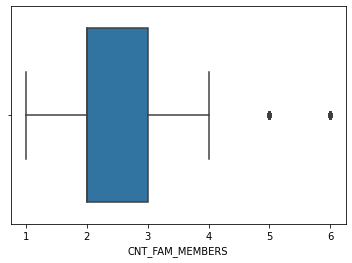

In [50]:
#boxplot for CNT_FAMILY_MEMBERS
sns.boxplot(df_app['CNT_FAM_MEMBERS'])

In [51]:
#removing outliers from CNT_FAM MEMBERs
high_bound = df_app['CNT_FAM_MEMBERS'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = df_app['CNT_FAM_MEMBERS'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 6.0
low_bound : 1.0


In [52]:
df_app = df_app[(df_app['CNT_FAM_MEMBERS'] >= low_bound) & (df_app['CNT_FAM_MEMBERS'] <= high_bound)]

In [53]:
df_app.head()

,ID,GENDER,CAR_OWNER,PROPERTY_OWNER,CNT_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,0,0,0,0,427500.0,0,1,2,3,33.0,12.0,2.0
1,5008805,0,0,0,0,427500.0,0,1,2,3,33.0,12.0,2.0
2,5008806,0,0,0,0,112500.0,0,0,0,0,59.0,3.0,2.0
3,5008808,1,1,0,0,270000.0,1,0,1,0,52.0,8.0,1.0
4,5008809,1,1,0,0,270000.0,1,0,1,0,52.0,8.0,1.0


In [54]:
#Credit Record
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [55]:
#checking for null values
df_credit.isnull().sum() #no null

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [56]:
df_credit['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [57]:
#categorizing status column, 0 = Good, 1 = Bad
df_credit['STATUS'].replace(['C', 'X'], 0, inplace = True)
df_credit['STATUS'].replace(['5', '2', '3', '4'], 1, inplace = True)

In [58]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [59]:
df_credit.drop('MONTHS_BALANCE', axis = 1, inplace = True)

In [60]:
df_credit['STATUS'].value_counts(normalize = True) * 100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [61]:
credit_agg = df_credit.groupby('ID').agg(max).reset_index()

In [62]:
credit_agg.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [63]:
#inner join the two data frames
df_final = pd.merge(df_app, credit_agg, on = 'ID', how = 'inner')
df_final.head()

,ID,GENDER,CAR_OWNER,PROPERTY_OWNER,CNT_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,0,1,2,3,33.0,12.0,2.0,1
1,5008805,0,0,0,0,427500.0,0,1,2,3,33.0,12.0,2.0,1
2,5008806,0,0,0,0,112500.0,0,0,0,0,59.0,3.0,2.0,0
3,5008808,1,1,0,0,270000.0,1,0,1,0,52.0,8.0,1.0,0
4,5008809,1,1,0,0,270000.0,1,0,1,0,52.0,8.0,1.0,0


In [64]:
df_final.shape #final df has 36,326 rows and 14 columns

(36326, 14)

In [65]:
#scaling income
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df_final['INCOME'] = scaler.fit_transform(df_final['INCOME'].values.reshape(-1, 1))


In [66]:
df_final.head()

,ID,GENDER,CAR_OWNER,PROPERTY_OWNER,CNT_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,0,1,2,3,33.0,12.0,2.0,1
1,5008805,0,0,0,0,427500.0,0,1,2,3,33.0,12.0,2.0,1
2,5008806,0,0,0,0,112500.0,0,0,0,0,59.0,3.0,2.0,0
3,5008808,1,1,0,0,270000.0,1,0,1,0,52.0,8.0,1.0,0
4,5008809,1,1,0,0,270000.0,1,0,1,0,52.0,8.0,1.0,0


In [67]:
#drop ID column not useful rn
df = df_final.drop(['ID'], axis = 1)

In [68]:
x = df.drop(['STATUS'], axis = 1)
y = df['STATUS']

In [69]:
#Machine Learning Model

In [70]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 10)
xtrain.shape, xtest.shape

((27244, 12), (9082, 12))

In [71]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(xtrain, ytrain)

LogisticRegression()

In [72]:
logistic.predict(xtest) #output of model predictions

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
ytest.values #what the actual values are

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
#Using automatic Packages
logistic.score(xtest, ytest)

0.8839462673419951

In [75]:
#K-Nearest Numbers
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 1)
kn.fit(xtrain, ytrain)
kn.score(xtest, ytest) #85% Accuracy

0.8524554062981722

In [76]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt.score(xtest, ytest) #87% Accuracy

0.8783307641488659

In [77]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain, ytrain)
svm.score(xtest, ytest) #88% Accuracy


0.8839462673419951

In [78]:
#Confusion Matrix, Model Accuracy, Classification Report (LOGISTIC REGRESSION)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Logistic Regression Model Accuracy: ", logistic.score(xtest,ytest)* 100, "%")
log_predict = logistic.predict(xtest)
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, log_predict))
print("\nClassification Report: ")
print(classification_report(ytest, log_predict))

Logistic Regression Model Accuracy:  88.3946267341995 %

Confusion Matrix:
[[8028    0]
 [1054    0]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8028
           1       0.00      0.00      0.00      1054

    accuracy                           0.88      9082
   macro avg       0.44      0.50      0.47      9082
weighted avg       0.78      0.88      0.83      9082



/Users/calebsiow/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/calebsiow/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/calebsiow/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
#Confusion Matrix, Model Accuracy, Classification Report (K-Nearest)
print("K-Nearest Model Accuracy: ", kn.score(xtest,ytest)* 100, "%")
kn_predict = kn.predict(xtest)
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, kn_predict))
print("\nClassification Report: ")
print(classification_report(ytest, kn_predict))

K-Nearest Model Accuracy:  85.24554062981721 %

Confusion Matrix:
[[7326  702]
 [ 638  416]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      8028
           1       0.37      0.39      0.38      1054

    accuracy                           0.85      9082
   macro avg       0.65      0.65      0.65      9082
weighted avg       0.86      0.85      0.85      9082



In [80]:
#Confusion Matrix, Model Accuracy, Classification Report (Decision Tree)
print("Decision Tree Model Accuracy: ", dt.score(xtest,ytest)* 100, "%")
dt_predict = dt.predict(xtest)
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, dt_predict))
print("\nClassification Report: ")
print(classification_report(ytest, dt_predict))

Decision Tree Model Accuracy:  87.83307641488659 %

Confusion Matrix:
[[7661  367]
 [ 738  316]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      8028
           1       0.46      0.30      0.36      1054

    accuracy                           0.88      9082
   macro avg       0.69      0.63      0.65      9082
weighted avg       0.86      0.88      0.87      9082



In [81]:
#Confusion Matrix, Model Accuracy, Classification Report (SVM)
print("Support Vector Classification Model Accuracy: ", svm.score(xtest,ytest)* 100, "%")
svm_predict = svm.predict(xtest)
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, svm_predict))
print("\nClassification Report: ")
print(classification_report(ytest, svm_predict))

Support Vector Classification Model Accuracy:  88.3946267341995 %

Confusion Matrix:
[[8028    0]
 [1054    0]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8028
           1       0.00      0.00      0.00      1054

    accuracy                           0.88      9082
   macro avg       0.44      0.50      0.47      9082
weighted avg       0.78      0.88      0.83      9082



/Users/calebsiow/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/calebsiow/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/calebsiow/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
